

# Project: [No_Show_Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

  In this projesct we discuss dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row of 110527 row and we have 14 columns : Patient Id, Appointment ID, Gender, Scheduled Day, Appointment Day ,Age Neighbourhood, Scholarship,	Hypertension,	Diabetes,	Alcoholism,	Handcap,SMS_received, No-show.
#‘ScheduledDay’ tells us on what day the patient set up their appointment.‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program.‘SMS_received’ if pattient receve sms befor Appointment or not .and other columns if patient suffer from any (Hypertension,	Diabetes,Alcoholism,Handcap).'no-show' to show us if patient come to appointment or no.


## Question(s) for Analysis
*  1- how many patient attend attend appointment and how many miss it?
*  2- is gender effect attendence of appointment?
*  3- is age effect attendnce of appointment?
*  4- is neighberhood effect attendnce of appointment?
*  5- is hypertinsion effect attendnce of appointment?
*  6- is send sms befor appointment date effect attendnce of appointment?
*  7- is handicap effect attendnce of appointment?
*  8- is alcohlism effect attendnce of appointment?
*  9- is the period between ScheduledDay and AppointmentDay effect attendnce of appointment?

 

In [7]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



In [8]:

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
# we notice that named fo columns need to change to become clear (PatientId) to (patient_id),(Hipertension) to (Hypertension)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [13]:
# from info we noticed some problems to deal with in data cleaning
# PatientId(float)must be(intiger)
# ScheduledDay,AppointmentDay(str)must be datetime


In [14]:
df.shape

(110527, 14)

In [15]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [78]:
# we must deal with age (-1) in our cleaning data

In [16]:
df.duplicated().sum()

0

In [17]:
# good thing we have no duplicates and no Nan in our data


### Data Cleaning
 

In [18]:
# we notice that named fo columns need to change to become clear (PatientId) to (patient_id),(Hipertension) to (Hypertension)
# PatientId(float)must be(intiger)
# ScheduledDay,AppointmentDay(str)must be datetime
# we must deal with age (-1) in our cleaning data

In [19]:
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.rename(columns={'PatientId':'Patient_Id','AppointmentID':'Appointment_ID','ScheduledDay':'Scheduled_Day','AppointmentDay':'Appointment_Day'}, inplace=True)
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)
df.head(0)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show


In [20]:
df['patient_id'] = df['patient_id']. astype(int)

In [21]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  int32              
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hypertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handcap          110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

In [23]:
index = df.query('age == -1').index
df.drop(index,inplace=True)

In [24]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,-2.140311e+09,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,1.508492e+08,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,-2.147484e+09,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-2.147484e+09,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.147484e+09,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-2.147484e+09,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.141274e+09,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

In [25]:
df['no_show'].value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

In [26]:
# no which mean patient attendence , yes which mean no attendence

In [27]:
# Q1  how many patient attend attend appointment and how many miss it?

Text(0, 0.5, 'NO_Show')

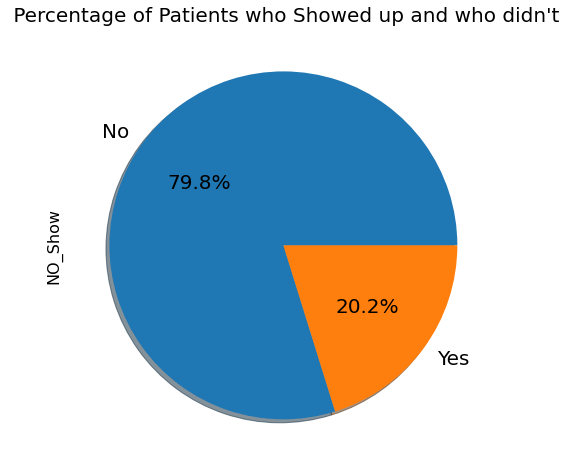

In [28]:
df.no_show.value_counts().plot(kind='pie',shadow = True,figsize=(13,8),autopct='%1.1f%%',textprops = {"fontsize":20})
plt.title(" Percentage of Patients who Showed up and who didn't",fontsize=20)
plt.ylabel('NO_Show', fontsize=16)

In [94]:
# we noticed 79.8% attend thier appointment and 20.2% miss it.

In [95]:
no_show_patients = df.query('no_show == "Yes"')
no_show_patients.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
6,-2147483648,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,-2147483648,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
11,-2147483648,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes
17,-2147483648,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes
20,-2147483648,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes


In [99]:
# Q2 is gender effect attendence of appointment?

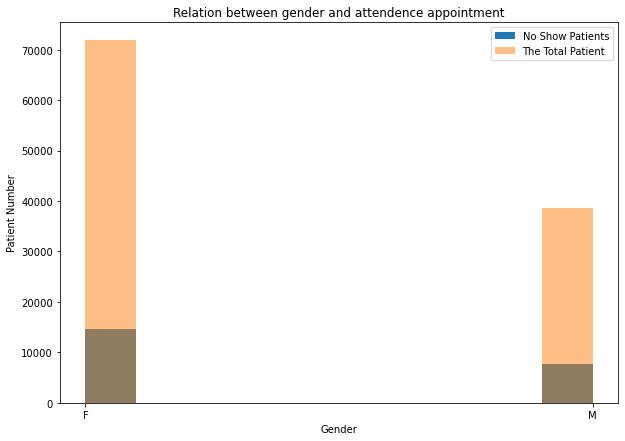

In [100]:
plt.figure(figsize=(10,7));
plt.hist(no_show_patients['gender']);
plt.hist(df['gender'], alpha=0.5);
plt.title("Relation between gender and attendence appointment")
plt.xlabel("Gender")
plt.ylabel("Patient Number");
plt.legend(["No Show Patients", "The Total Patient"])

In [101]:
# from figure we can notice female patient double male patient and the miss is also double
# gender is not a factor i can considered

In [102]:
# Q3 is age effect attendnce of appointment?

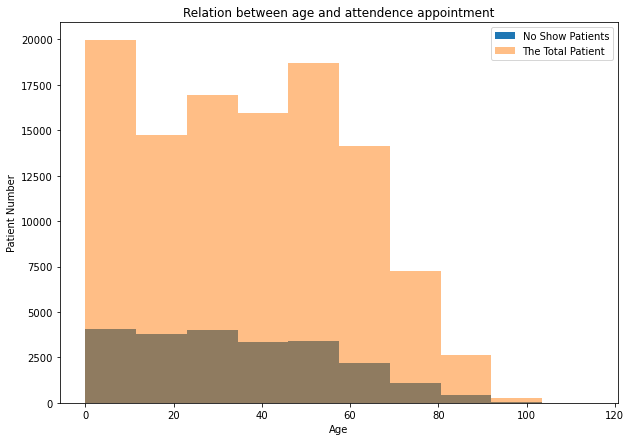

In [29]:
plt.figure(figsize=(10,7));
plt.hist(no_show_patients['age']);
plt.hist(df['age'], alpha=0.5);
plt.title("Relation between age and attendence appointment")
plt.xlabel("Age")
plt.ylabel("Patient Number");
plt.legend(["No Show Patients", "The Total Patient"])

In [30]:
# we notice age sekwed to right which mean young age > old edge in data

In [103]:
# from figure we notice that number of patient miss there appointment in ages from 0 to 60 is similar so:
#  we have no relation bettwen age and miss appointment
 

In [104]:
# Q4 Is neighberhood effect attendnce of appointment?

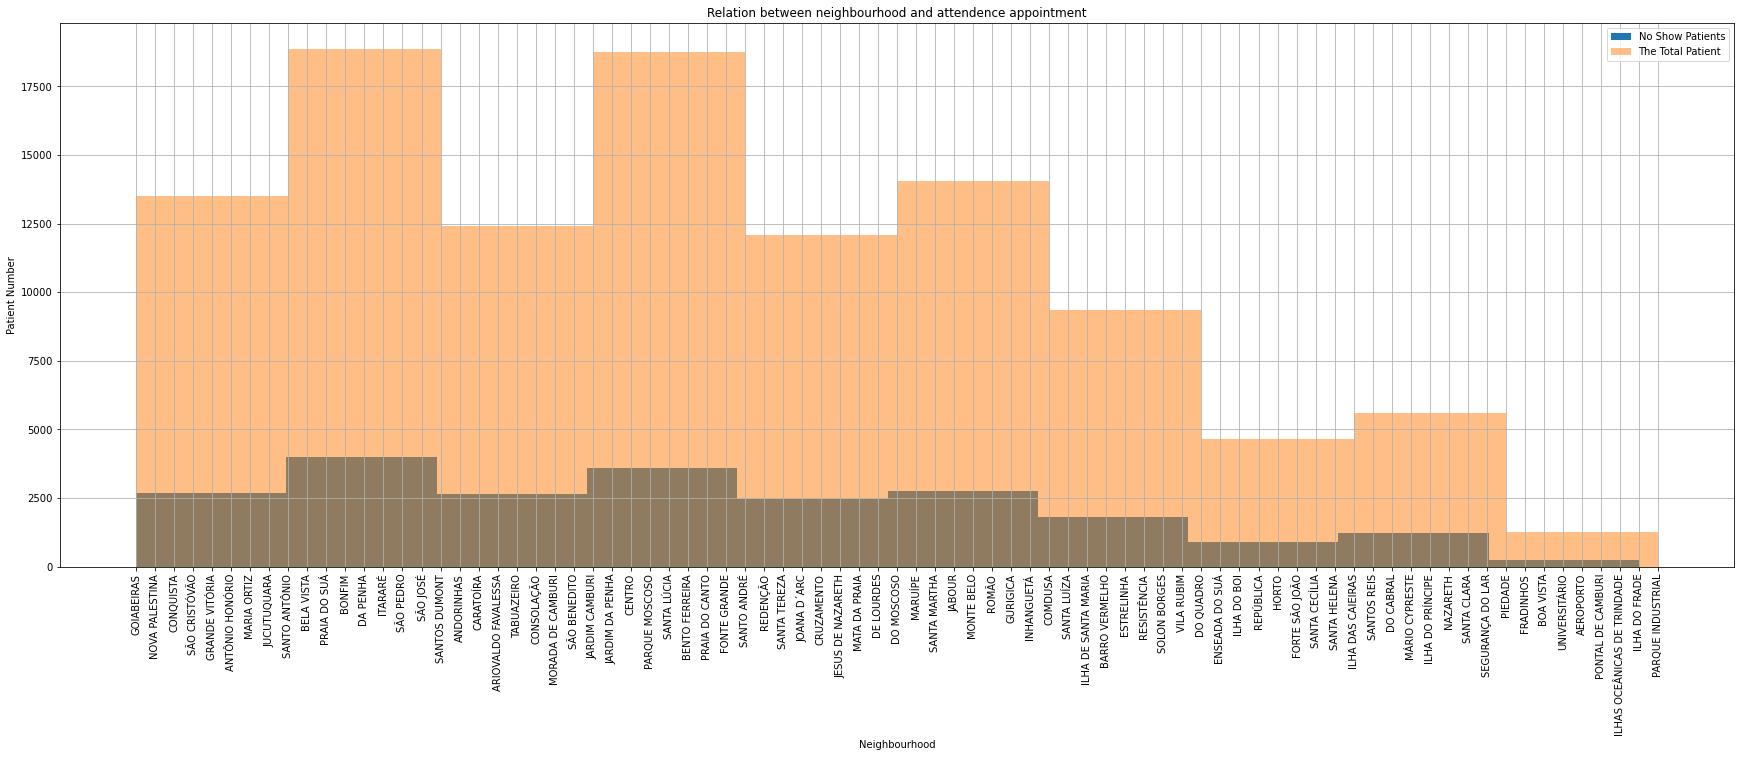

In [63]:
plt.figure(figsize=(30,10));
plt.xticks(rotation=90);
plt.grid()
plt.hist(no_show_patients['neighbourhood']);
plt.hist(df['neighbourhood'], alpha=0.5);
plt.title("Relation between neighbourhood and attendence appointment")
plt.xlabel("Neighbourhood")
plt.ylabel("Patient Number");
plt.legend(["No Show Patients","The Total Patient"])

In [111]:
# we notice the neighbourhood that have max patient is that have max miss also

In [112]:
# Q5 is hypertinsion effect attendnce of appointment?

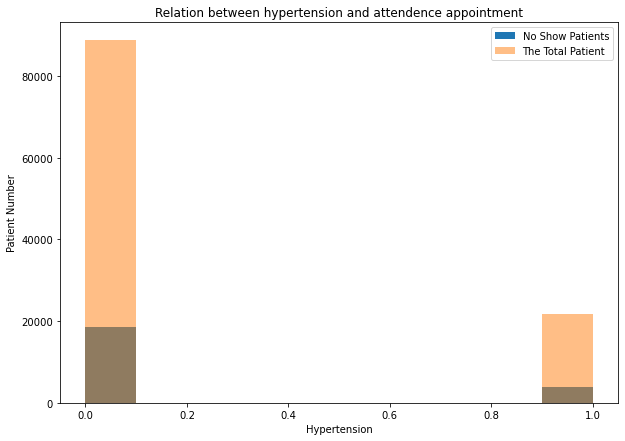

In [113]:
plt.figure(figsize=(10,7));
plt.hist(no_show_patients['hypertension']);
plt.hist(df['hypertension'], alpha=0.5);
plt.title("Relation between hypertension and attendence appointment")
plt.xlabel("Hypertension")
plt.ylabel("Patient Number");
plt.legend(["No Show Patients","The Total Patient"])

In [114]:
# we notice patient that have hypertension and attend appointment is more than that don't have and miss appointment
# i think we have no relation between  hypertension and miss appointment

In [115]:
df['hypertension'].value_counts()

0    88725
1    21801
Name: hypertension, dtype: int64

In [116]:
no_show_patients['hypertension'].value_counts()


0    18547
1     3772
Name: hypertension, dtype: int64

In [117]:
# Q6 is send sms befor appointment date effect attendnce of appointment?


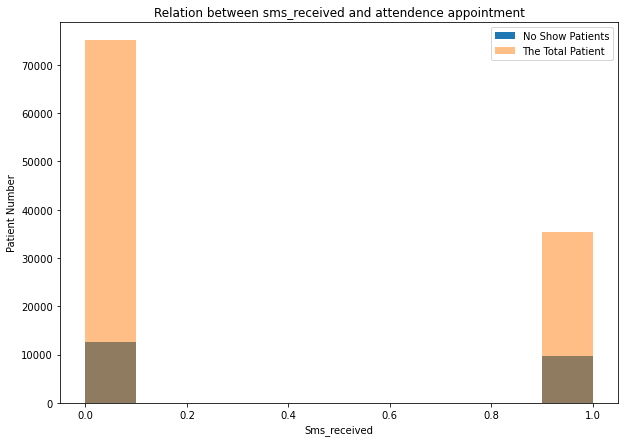

In [118]:
plt.figure(figsize=(10,7));
plt.hist(no_show_patients['sms_received']);
plt.hist(df['sms_received'], alpha=0.5);
plt.title("Relation between sms_received and attendence appointment")
plt.xlabel("Sms_received")
plt.ylabel("Patient Number");
plt.legend(["No Show Patients","The Total Patient"])

In [119]:
# we have about 70% didn,t recieve sms and attend thier appointment and 30% who recived sms about 30% of them miss there appointment.
# so i think we have no relation bettwen sms send and miss appointment.

In [120]:
df['sms_received'].value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

In [121]:
# Q7 is handicap effect attendnce of appointment?///Q8  s alcohlism effect attendnce of appointment?

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

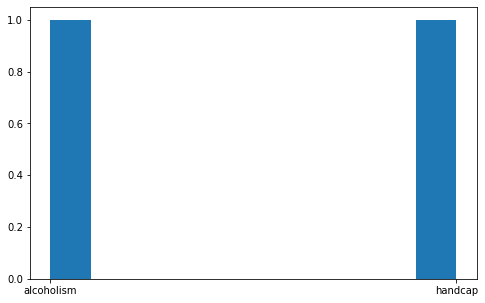

In [122]:
plt.figure(figsize=(8, 5))
plt.hist(['alcoholism', 'handcap'])

In [123]:
# from figure there is no relation between (allcoholism , handcap ) and miss appointment

In [124]:
# Q9 s the period between ScheduledDay and AppointmentDay effect attendnce of appointment?

In [125]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date

In [126]:
df['waiting_days'] =df['appointment_day'] - df['scheduled_day']
df.head(2)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days
0,-2147483648,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,-2147483648,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days


In [127]:
df['waiting_days'] = df['waiting_days'].dt.days

In [128]:
waitTime = df.groupby('no_show')['waiting_days'].mean()
waitTime

no_show
No      8.754759
Yes    15.831489
Name: waiting_days, dtype: float64

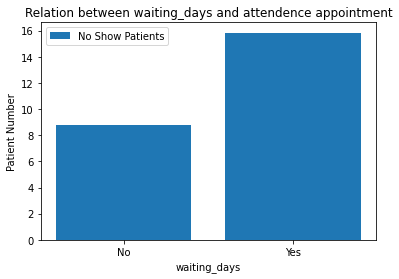

In [129]:
plt.bar(waitTime.index,waitTime.values);
plt.title("Relation between waiting_days and attendence appointment")
plt.xlabel("waiting_days")
plt.ylabel("Patient Number");
plt.legend(["No Show Patients"])

In [130]:
# from figure we can see that patient who attend have less waiting time than who miss
# patient attend have avergr time of 8 days
# patient miss have averge time of 15 days

<a id='conclusions'></a>
## Conclusions
* we noticed 79.8% attend thier appointment and 20.2% miss it.
* we can notice female patient double male patient and the miss is also double SO gender is not a factor i can considered.
* we notice that number of patient miss there appointment in ages from 0 to 60 is similar so we have no relation bettwen age     and miss appointment.
* we notice the neighbourhood that have max patient is that have max miss also so we have no relation.
* we notice patient that have hypertension and attend appointment is more than that don't have and miss appointment i think we   have no relation between  hypertension and miss appointment.
* we have about 70% didn,t recieve sms and attend thier appointment and 30% who recived sms about 30% of them miss there         appointment so i think we have no relation bettwen sms send and miss appointment.
* there is no relation between (allcoholism , handcap ) and miss appointment.
* we can see that patient who attend have less waiting time than who miss,patient attend have avergr time of 8 days,patient       miss have averge time of 15 days.
 
 
 




### Limitations
* appointment day and schedualed day need to be in date time.
* age in negative value was removed no age less than 0.
* column label 'No-show' is changed to 'no_show' to be easier while coding.
* i think we need more data to have clear reasons for missing appointment.
